In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns 
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier 
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score

In [34]:
dfs=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day32-binning-and-binarization/train.csv",usecols=['Age',"Fare","Survived"])

In [43]:
dfs.dropna(inplace=True)

In [81]:
dfs.head(2)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833


In [44]:
dfs.shape

(714, 3)

In [45]:
X=dfs.iloc[:,1:]
y=dfs['Survived']

In [46]:
X.shape

(714, 2)

In [47]:
y.shape

(714,)

In [48]:
X['Age'].isnull().sum()

0

In [49]:
X.dropna(
    inplace=True)

In [50]:
X.shape

(714, 2)

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=45)

In [52]:
X_train.shape

(535, 2)

In [53]:
y_train.shape

(535,)

In [54]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
Y_pred=DT.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(Y_pred,y_test)*100

56.98324022346368

In [65]:
np.mean(cross_val_score(DT,X,y,cv=30,scoring='accuracy'))*100

62.60265700483092

In [66]:
# discritization

In [67]:
kbin_age=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=15,encode='ordinal', strategy='quantile')

In [68]:
kbin_age

KBinsDiscretizer(encode='ordinal', n_bins=15)

In [69]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
],remainder='passthrough')

In [72]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

In [77]:
trf.named_transformers_['first'].bin_edges_ # here you can check the interval of the entire data

array([array([ 0.42,  9.  , 17.  , 19.  , 21.  , 24.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 41.2 , 47.  , 54.  , 74.  ])             ],
      dtype=object)

In [78]:
trf.named_transformers_['second'].n_bins_

array([15])

In [79]:
trf.named_transformers_['first'].n_features_in_

1

In [ ]:
# here i have converted the array into dataFrame


In [84]:
output=pd.DataFrame({
    'Age':X_train['Age'],
    'trf_age':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'trf_fare':X_train_trf[:,1]
})

In [87]:
output['age_lable']=pd.cut(x=X_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_lable']=pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist() )

In [88]:
output.sample(5)

,Age,trf_age,fare,trf_fare,age_lable,fare_lable
378,20.0,3.0,4.0125,0.0,"(19.0, 21.0]","(0.0, 7.229]"
426,28.0,7.0,26.0000,9.0,"(25.0, 28.0]","(17.96, 26.0]"
542,11.0,1.0,31.2750,10.0,"(9.0, 17.0]","(27.0, 31.342]"
11,58.0,14.0,26.5500,9.0,"(54.0, 74.0]","(26.0, 27.0]"
385,18.0,2.0,73.5000,13.0,"(17.0, 19.0]","(52.0, 73.5]"


In [89]:
clf=DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)

DecisionTreeClassifier()

In [91]:
y_pred=clf.predict(X_test_trf)

In [93]:
accuracy_score(y_pred,y_test)*100

63.128491620111724

In [94]:
X_trf=trf.fit_transform(X)

In [96]:
np.mean(cross_val_score(clf,X,y,scoring='accuracy'))

0.6204471584753275

In [ ]:
# it helps to make the data uniformaly transformed across the spread

In [126]:
def Discritizer(bins, strategy):
    """ used different bins and strategy """
    kbin_age=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare=KBinsDiscretizer(n_bins=bins,encode='ordinal', strategy=strategy)
    trf=ColumnTransformer([('first',kbin_age,[0]),('second',kbin_fare,[1])],remainder='passthrough')
    X_trf=trf.fit_transform(X)
    DT= DecisionTreeClassifier()
    print(np.mean(cross_val_score(DT,X,y,cv=10,scoring='accuracy')))
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X_train['Age'])
    plt.title("Before age applying Discrtizer")
    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("after age discritizer")
    plt.show()
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X_train['Fare'])
    plt.title("before fare applying Discritizer")
    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("after fare ")
    plt.show()
    
    
    
    


0.6317097026604068


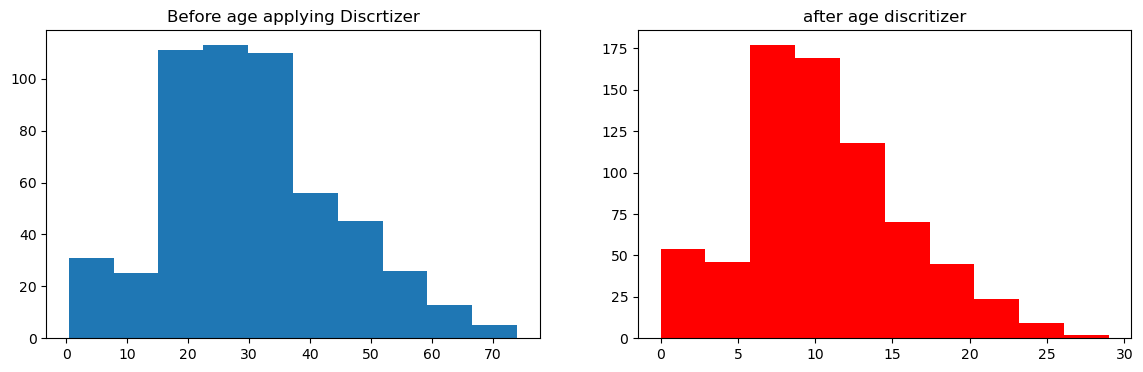

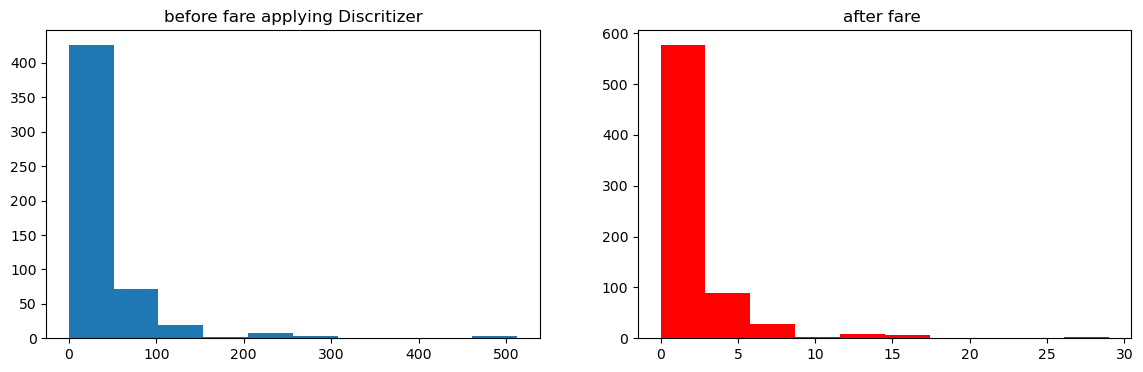

In [127]:
Discritizer(30,'uniform') #kmeans', 'quantile', 'uniform'

# binarization  

In [128]:
df=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day32-binning-and-binarization/train.csv",usecols=['Age',"Fare","Survived",'Parch','SibSp'])

In [129]:
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [130]:
df.dropna(inplace=True)

In [131]:
df['family']=df['SibSp']+df['Parch']

In [132]:
df

,Survived,Age,SibSp,Parch,Fare,family
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1
2,1,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,1
4,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,5
886,0,27.0,0,0,13.0000,0
887,1,19.0,0,0,30.0000,0
889,1,26.0,0,0,30.0000,0


In [133]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [134]:
df

,Survived,Age,Fare,family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0
...,...,...,...,...
885,0,39.0,29.1250,5
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
889,1,26.0,30.0000,0


In [135]:
X=df.iloc[:,1:]
y=df.iloc[:,0]


In [136]:
X.shape

(714, 3)

In [138]:
y.shape

(714,)

In [139]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=45)

In [140]:
X_train

,Age,Fare,family
145,19.0,36.7500,2
512,36.0,26.2875,0
352,15.0,7.2292,2
278,7.0,29.1250,5
884,25.0,7.0500,0
...,...,...,...
205,2.0,10.4625,1
761,41.0,7.1250,0
687,19.0,10.1708,0
806,39.0,0.0000,0


In [142]:
Clf=DecisionTreeClassifier()

In [143]:
clf.fit(X_train,y_train
       
       )

DecisionTreeClassifier()

In [144]:
y_pred=clf.predict(X_test)

In [145]:
accuracy_score(y_pred,y_test)

0.6256983240223464

In [147]:
# applying cross validation on top of that
np.mean(cross_val_score(clf,X,y,cv=10,scoring='accuracy'))

0.6485133020344287

In [148]:
# after binarization 

In [150]:
from sklearn.preprocessing import Binarizer

In [154]:
trfs=ColumnTransformer([
    ('bin',Binarizer(copy=False),['family']),
],remainder='passthrough')

In [155]:
X_train_trfs=trfs.fit_transform(X_train)
X_test_trfs=trfs.transform(X_test)

In [156]:
X_transformed=trfs.fit_transform(X)

In [157]:
clf.fit(X_train_trfs,y_train)

DecisionTreeClassifier()

In [159]:
yprd=clf.predict(X_test_trfs)

In [160]:
accuracy_score(yprd,y_test)

0.5921787709497207

In [168]:
np.mean(cross_val_score(clf,X_transformed,y,cv=25,scoring='accuracy'))

0.6387192118226601

In [169]:
pd.DataFrame(X_train_trfs,columns=['Age','Fare',"family"])

,Age,Fare,family
0,1.0,19.0,36.7500
1,0.0,36.0,26.2875
2,1.0,15.0,7.2292
3,1.0,7.0,29.1250
4,0.0,25.0,7.0500
...,...,...,...
530,1.0,2.0,10.4625
531,0.0,41.0,7.1250
532,0.0,19.0,10.1708
533,0.0,39.0,0.0000
